link to dataset: https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("/content/train.csv")

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [4]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [5]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([3, 6, 2, ..., 8, 9, 2])

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

W: weight, B: bias, Z: activation function

input layer: 784,
hidden layer: 10,
output layer: 10

rand: generates values between 0 and 1 for each value of the array

In [8]:
def ReLU(Z):
    return np.maximum(Z, 0)

rectified linear unit: relu(x) = x (if x > 0), =0 (if x <= 0)

In [9]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

softmax activation function: e^zi/sum(e^zj), gives the probability

In [10]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [11]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

one hot: each category is a separate column with a 1 indicating its presence and 0 for everything else

In [12]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

dz2: error of the second layer

dw2: derivation of the loss function with respect to the weights in layer 2

db2: average of the absolute error for the second layer

dz1: (error from second layer to which weights are applied in reverse to get to errors in first layer) * (derivative of the activation function to undo the activation function)

dw1, db1 are calculated similar to dw2, db2

In [13]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

the values are corrected by subtracting the error from the original predicted values

alpha: hyper parameter, not trained by the model

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 6 6 ... 0 6 7] [3 6 2 ... 8 9 2]
0.14995121951219512
Iteration:  10
[8 8 0 ... 0 4 7] [3 6 2 ... 8 9 2]
0.1888780487804878
Iteration:  20
[3 1 0 ... 0 7 7] [3 6 2 ... 8 9 2]
0.2674878048780488
Iteration:  30
[3 1 0 ... 0 7 7] [3 6 2 ... 8 9 2]
0.3289268292682927
Iteration:  40
[3 6 0 ... 0 7 7] [3 6 2 ... 8 9 2]
0.3789268292682927
Iteration:  50
[3 6 0 ... 0 7 2] [3 6 2 ... 8 9 2]
0.41865853658536584
Iteration:  60
[3 6 0 ... 0 7 2] [3 6 2 ... 8 9 2]
0.4578048780487805
Iteration:  70
[3 6 0 ... 0 9 2] [3 6 2 ... 8 9 2]
0.49265853658536585
Iteration:  80
[3 6 0 ... 0 9 2] [3 6 2 ... 8 9 2]
0.5246341463414634
Iteration:  90
[3 6 2 ... 0 9 2] [3 6 2 ... 8 9 2]
0.5573170731707318
Iteration:  100
[3 6 2 ... 5 9 2] [3 6 2 ... 8 9 2]
0.5898780487804878
Iteration:  110
[3 6 2 ... 5 9 2] [3 6 2 ... 8 9 2]
0.6216829268292683
Iteration:  120
[3 6 2 ... 5 9 2] [3 6 2 ... 8 9 2]
0.6484634146341464
Iteration:  130
[3 6 2 ... 5 9 2] [3 6 2 ... 8 9 2]
0.6691219512195122
Iteration:  14

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


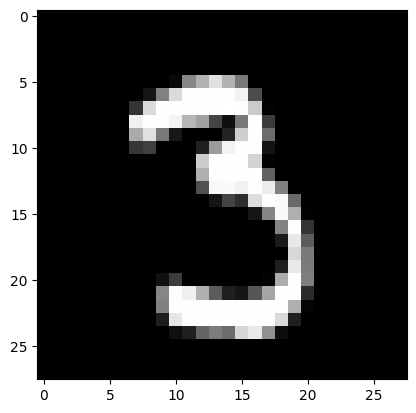

In [32]:
test_prediction(4, W1, b1, W2, b2)


In [31]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 1 0 6 1 2 1 5 4 2 1 0 5 0 0 1 7 7 8 8 4 0 3 1 6 6 6 7 6 3 5 9 4 2 8 5 3
 1 1 2 1 9 6 7 1 6 3 2 9 7 4 6 6 1 1 5 2 1 8 1 2 8 9 9 0 8 8 4 3 5 0 1 8 1
 4 3 4 0 9 1 5 8 7 7 7 3 4 2 9 1 2 4 0 5 8 8 9 7 8 9 2 8 7 3 9 0 6 4 4 1 3
 1 1 8 0 4 6 0 8 3 4 2 8 1 1 6 4 7 4 2 0 0 6 3 0 1 2 1 2 6 4 0 6 9 5 9 3 7
 2 2 8 5 6 8 5 3 8 8 4 6 3 0 9 7 5 5 2 4 4 2 7 6 7 0 0 1 8 4 3 0 3 5 8 8 8
 1 5 8 5 7 7 2 7 5 9 6 7 3 5 1 8 2 5 9 0 1 0 2 1 0 2 8 3 8 2 4 0 1 5 5 4 4
 8 9 2 4 6 1 6 1 6 4 1 1 8 5 0 7 6 3 6 1 4 8 2 5 6 7 0 4 1 1 1 4 8 6 0 1 8
 6 6 8 1 7 5 7 2 4 4 2 8 5 9 7 5 8 8 5 7 6 3 7 6 8 3 7 2 5 8 5 1 2 2 6 5 0
 1 3 8 8 8 9 7 4 2 7 3 7 0 1 7 1 3 7 9 3 1 2 3 0 6 1 1 7 2 6 5 3 2 0 6 2 0
 5 0 1 4 8 4 7 7 6 0 7 2 4 4 8 6 3 4 5 6 1 7 5 2 1 2 1 9 3 9 6 1 9 0 8 4 1
 7 7 0 1 0 6 6 9 8 5 7 7 3 3 4 6 3 1 1 7 7 3 3 7 3 2 0 1 4 4 5 5 0 2 8 5 0
 4 1 2 3 9 9 8 0 2 8 4 5 9 3 0 1 9 5 2 2 9 4 7 7 4 2 4 9 7 3 4 5 3 6 7 1 8
 9 7 7 0 3 9 2 4 4 7 7 2 0 5 1 8 7 9 2 2 0 8 2 8 1 5 0 0 7 9 5 9 4 3 0 3 7
 1 1 8 0 0 5 9 0 5 8 0 7 

0.834